In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
# Load your dataset
data = pd.read_csv(r"data\advertising.csv")
df = data.copy()
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


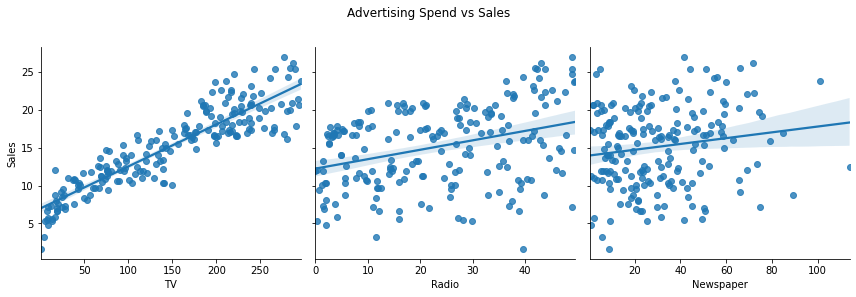

In [14]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height=4)
plt.suptitle("Advertising Spend vs Sales", y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# 1. Prepare features and target
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

# 2. Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the model on the training set
mlr_model = LinearRegression() 
mlr_model.fit(X_train, y_train) #fitting our model with training data to train the model.

# 4. Model parameters
intercept = mlr_model.intercept_
coefficients = mlr_model.coef_

print(f"Intercept: {intercept:.4f}")
print(f"Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"  {feature}: {coef:.4f}")

# 5. Predictions on the test set
y_pred = mlr_model.predict(X_test)  #passing our test set of features and asking the model to predict.

# 6. Model evaluation
r2 = r2_score(y_test, y_pred) #comparing predicted vs original
mse = mean_squared_error(y_test, y_pred)

print(f"\nR-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Intercept: 4.7141
Coefficients:
  TV: 0.0545
  Radio: 0.1009
  Newspaper: 0.0043

R-squared: 0.9059
Mean Squared Error: 2.9078


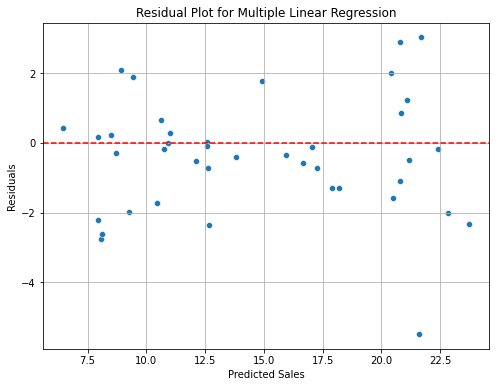

In [16]:
# 7. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Linear Regression")
plt.grid(True)
plt.show()

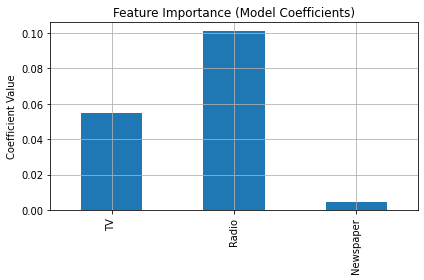

In [18]:
coefs = pd.Series(mlr_model.coef_, index=X.columns)
coefs.plot(kind='bar', title='Feature Importance (Model Coefficients)', figsize=(6,4))
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()
